In [57]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import cv2

from skimage import io, color, filters, morphology, measure
from skimage.transform import resize, rotate
from sklearn.cluster import KMeans

import scipy
from scipy import ndimage

from skimage import measure, color, io
import imutils
from PIL import Image

In [114]:
img = cv2.imread('data/small.png')
rows, cols, bands = img.shape
X = img.reshape(rows*cols, bands)
print(rows)
print(cols)
print(bands)

292
330
3


In [115]:
img_g = cv2.imread('data/small.png', 0)

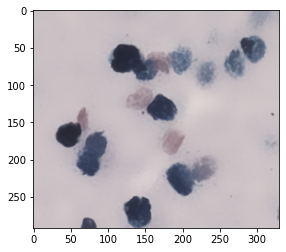

In [116]:
#let's start with edge detection... 
#preprocessing
blur = cv2.bilateralFilter(img, 30,75,75)
plt.imshow(blur)

In [117]:
blur1 = blur[:,:,1]

#plt.imshow(blur1, cmap='gray')

In [118]:
#hue, saturation, value
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

https://scipy-lectures.org/packages/scikit-image/index.html
check this out might have solution to the blob issue (watershed segmentation and/or random walker segmentation) 

In [119]:
ret1, thresh = cv2.threshold(blur, 140, 255, cv2.THRESH_BINARY_INV)

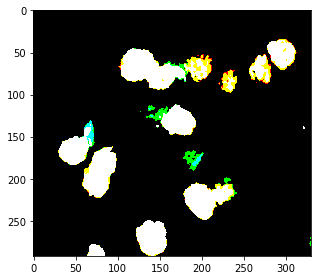

In [120]:
#threshold
io.imshow(thresh)

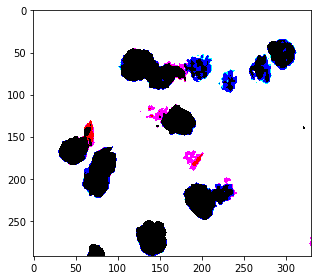

In [121]:
ret1, thresh = cv2.threshold(blur, 140, 255, cv2.THRESH_BINARY)
io.imshow(thresh)

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 1)

#sure background
sure_bg = cv2.dilate(opening,kernel,iterations=2)
plt.imshow(sure_bg) 

In [125]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel) 

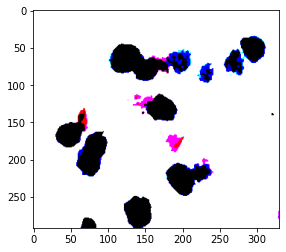

In [126]:
plt.imshow(opening)

In [127]:
rows, cols, bands = opening.shape
X = thresh.reshape(rows*cols, bands)
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
labels = kmeans.labels_.reshape(rows, cols)

for i in np.unique(labels):
    blobs = np.int_(morphology.binary_opening(labels == i))
    color = np.around(kmeans.cluster_centers_[i])
    count = len(np.unique(measure.label(blobs))) - 1
    print('Color: {}  >>  Objects: {}'.format(color, count))
    
#[255,0,255] fushia
#[255, 0, 0] red
# [0, 0, 255] blue
# [0, 255, 255] cyan
# [255, 255, 0] yellow

Color: [0. 0. 0.]  >>  Objects: 16
Color: [255. 255. 255.]  >>  Objects: 1
Color: [  0.   0. 255.]  >>  Objects: 23
Color: [255.   0. 255.]  >>  Objects: 8
Color: [255.   0.   0.]  >>  Objects: 4


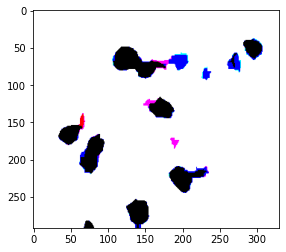

In [128]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)
plt.imshow(sure_bg, cmap='gray') 

In [168]:
def change_color(image, c_orig, c_new):
    colors = {'red': [255, 0, 0],
      'fushia': [255, 0, 255],
      'green': [0, 255, 0],
      'cyan': [0, 255, 255],
      'blue': [0, 0, 255],
      'yellow': [255, 255, 0],
      'white': [255, 255, 255],
      'black': [0, 0, 0]
     }
        
    r1, g1, b1 = colors[c_orig]
    r2, g2, b2 = colors[c_new]
    

    
    red, green, blue = thresh[:,:,0], thresh[:,:,1], thresh[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    new_image = image.copy()
    new_image[:,:,:3][mask] = [r2, g2, b2]
    return new_image


In [130]:
im1 = change_color(thresh, 'blue', 'black')
im2 = change_color(im1, 'cyan', 'black')
im3 = change_color(im2, 'red', 'fushia')
im4 = change_color(im3, 'yellow', 'black')

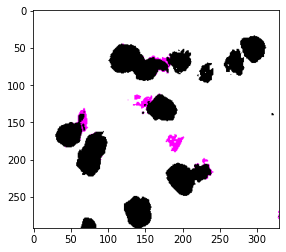

In [131]:
plt.imshow(im4)

In [132]:
rows, cols, bands = opening.shape
X = im4.reshape(rows*cols, bands)

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_.reshape(rows, cols)

for i in np.unique(labels):
    blobs = np.int_(morphology.binary_opening(labels == i))
    color = np.around(kmeans.cluster_centers_[i])
    count = len(np.unique(measure.label(blobs))) - 1
    print('Color: {}  >>  Objects: {}'.format(color, count))


Color: [0. 0. 0.]  >>  Objects: 14
Color: [255. 255. 255.]  >>  Objects: 1
Color: [255.   0. 255.]  >>  Objects: 7


In [138]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(im4,cv2.MORPH_OPEN,kernel) 

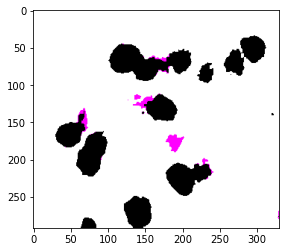

In [139]:
sure_bg = cv2.dilate(im4,kernel,iterations=1)
plt.imshow(opening, cmap='gray') 

In [146]:
kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(im4,kernel,iterations = 2)

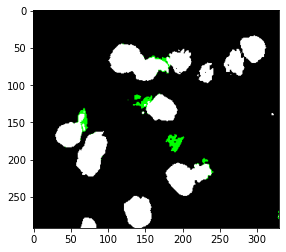

In [153]:
ret1, thresh = cv2.threshold(im4, 0, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh)

In [157]:
kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(thresh,kernel,iterations = 4)

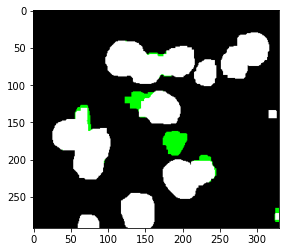

In [158]:
plt.imshow(dilation)

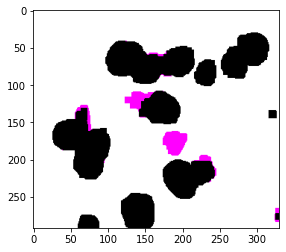

In [160]:
ret1, im5 = cv2.threshold(dilation, 0, 255, cv2.THRESH_BINARY_INV)
plt.imshow(im5)

In [161]:
rows, cols, bands = opening.shape
X = im5.reshape(rows*cols, bands)

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_.reshape(rows, cols)

for i in np.unique(labels):
    blobs = np.int_(morphology.binary_opening(labels == i))
    color = np.around(kmeans.cluster_centers_[i])
    count = len(np.unique(measure.label(blobs))) - 1
    print('Color: {}  >>  Objects: {}'.format(color, count))


Color: [0. 0. 0.]  >>  Objects: 10
Color: [255. 255. 255.]  >>  Objects: 1
Color: [255.   0. 255.]  >>  Objects: 9


In [192]:
closing = cv2.morphologyEx(im4, cv2.MORPH_CLOSE, kernel, iterations = 4)

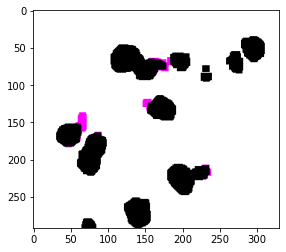

In [193]:
plt.imshow(closing)

In [194]:
rows, cols, bands = closing.shape
X = closing.reshape(rows*cols, bands)

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_.reshape(rows, cols)

for i in np.unique(labels):
    blobs = np.int_(morphology.binary_opening(labels == i))
    color = np.around(kmeans.cluster_centers_[i])
    count = len(np.unique(measure.label(blobs))) - 1
    print('Color: {}  >>  Objects: {}'.format(color, count))


Color: [0. 0. 0.]  >>  Objects: 12
Color: [255. 255. 255.]  >>  Objects: 1
Color: [255.   0. 255.]  >>  Objects: 4


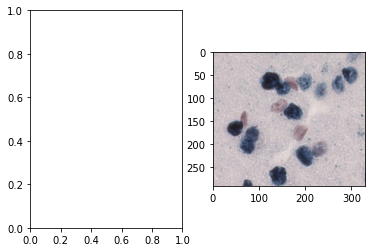

In [195]:
fig, ax = plt.subplots(1, 2)

ax1 = plt.imshow(closing)
ax2 = plt.imshow(img)